In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('kes_students_data.csv')

In [3]:
data.head(3)

,Unnamed: 0,student_id,Name,Class,Address
0,0,1,Om,MSC AI,Vasai
1,1,2,Parth,MSC AI,Charni Road
2,2,3,Sami,MSC AI,Dahisar


In [4]:
data = data.drop('Unnamed: 0', axis = 1)

In [5]:
data.shape

(50, 4)

In [6]:
marks_data = pd.read_csv('kes_students_marks.csv')

In [7]:
marks_data.head(2)

,Unnamed: 0,student_id,Marks,Grade
0,0,1,88,A
1,1,2,90,O


In [8]:
marks_data = marks_data.drop('Unnamed: 0', axis = 1)

In [9]:
marks_data['Marks'].mean()

np.float64(80.92)

<Axes: title={'center': 'Grade Evaluation'}, xlabel='Grade'>

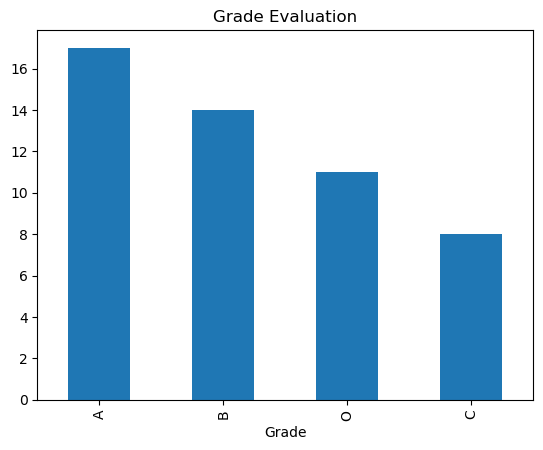

In [10]:
marks_data['Grade'].value_counts().plot(kind="bar", title="Grade Evaluation")

Q1️⃣ Merge the student data and marks data using student_id
and create a single DataFrame.

In [11]:
merged_data = data.merge(marks_data, how = 'inner', on = 'student_id')

In [12]:
merged_data.head(2)

,student_id,Name,Class,Address,Marks,Grade
0,1,Om,MSC AI,Vasai,88,A
1,2,Parth,MSC AI,Charni Road,90,O


In [13]:
merged_data[(merged_data['Class'] == "MSC DS") & (merged_data['Grade'] == "O")].sort_values(ascending=False, by='Marks')

,student_id,Name,Class,Address,Marks,Grade
42,43,Harsh,MSC DS,CBD Belapur,95,O
5,6,Bhakti,MSC DS,Andheri,92,O
36,37,Rakesh,MSC DS,Ghansoli,92,O
18,19,Kunal,MSC DS,Thane,91,O
45,46,Ritu,MSC DS,Pen,91,O


In [14]:
merged_data.groupby('Class')['Marks'].sum()

Class
MSC AI    1623
MSC DS    1212
MSC IT    1211
Name: Marks, dtype: int64

Q2️⃣ Find the average Marks for each Class.

In [15]:
merged_data.groupby('Class')['Marks'].mean()

Class
MSC AI    81.150000
MSC DS    80.800000
MSC IT    80.733333
Name: Marks, dtype: float64

Q3️⃣ Find how many students are there in each Grade,
and display the result sorted by count (descending).

In [16]:
merged_data.Grade.value_counts(ascending=False)

Grade
A    17
B    14
O    11
C     8
Name: count, dtype: int64

Q4️⃣ List all students who scored 90 or above, showing:
student_id,
Name,
Class,
Marks,
Grade.

In [17]:
merged_data[(merged_data['Marks'] >= 90)][['student_id', 'Name', 'Class', 'Marks', 'Grade']].sort_values(by='Marks',ascending=False)

,student_id,Name,Class,Marks,Grade
11,12,Sneha,MSC AI,95,O
42,43,Harsh,MSC DS,95,O
28,29,Tanya,MSC IT,94,O
22,23,Yash,MSC IT,93,O
5,6,Bhakti,MSC DS,92,O
36,37,Rakesh,MSC DS,92,O
45,46,Ritu,MSC DS,91,O
18,19,Kunal,MSC DS,91,O
1,2,Parth,MSC AI,90,O
14,15,Saurabh,MSC AI,90,O


Q5️⃣ Find the top 5 students by Marks.

In [18]:
merged_data[['Name', 'Class', 'Marks', 'Grade']].sort_values(by = 'Marks', ascending=False).head(5)

,Name,Class,Marks,Grade
11,Sneha,MSC AI,95,O
42,Harsh,MSC DS,95,O
28,Tanya,MSC IT,94,O
22,Yash,MSC IT,93,O
36,Rakesh,MSC DS,92,O


Q6️⃣ For each Class, calculate: Average Marks, Maximum Marks, Minimum Marks

In [19]:
merged_data.groupby('Class')['Marks'].agg(['mean', 'max', 'min'])

,mean,max,min
Class,,,
MSC AI,81.150000,95,67
MSC DS,80.800000,95,66
MSC IT,80.733333,94,66


Q7️⃣ Find Classes where the average Marks is greater than 80.

In [20]:
merged_data.groupby('Class')['Marks'].mean() > 80

Class
MSC AI    True
MSC DS    True
MSC IT    True
Name: Marks, dtype: bool

In [21]:
merged_data.groupby('Class')['Marks'].mean()[merged_data.groupby('Class')['Marks'].mean() > 80]

Class
MSC AI    81.150000
MSC DS    80.800000
MSC IT    80.733333
Name: Marks, dtype: float64

Q8️⃣ Create a new column called Performance: Marks ≥ 85 → "Excellent", Marks between 70 and 84 → "Good", Marks < 70 → "Needs Improvement"

In [22]:
import numpy as np
merged_data['Performance'] = np.where(merged_data['Marks'] >= 85, "Excellent",
                                      np.where(merged_data['Marks'].between(70, 84), "Good", 
                                               np.where(merged_data['Marks'] < 70, "Needs Improvement", "Send him to Military School")))

Q9️⃣ Find students who belong to MSC AI and have Grade A or O.

In [23]:
merged_data[(merged_data['Class'] == "MSC AI") & (merged_data['Grade'].isin(['A','O']))]

,student_id,Name,Class,Address,Marks,Grade,Performance
0,1,Om,MSC AI,Vasai,88,A,Excellent
1,2,Parth,MSC AI,Charni Road,90,O,Excellent
2,3,Sami,MSC AI,Dahisar,82,A,Good
4,5,Kartik,MSC AI,Borivali,80,A,Good
6,7,Rohit,MSC AI,Malad,85,A,Excellent
11,12,Sneha,MSC AI,Lower Parel,95,O,Excellent
14,15,Saurabh,MSC AI,Sion,90,O,Excellent
23,24,Komal,MSC AI,Badlapur,82,A,Good
29,30,Siddharth,MSC AI,Kasara,87,A,Excellent
32,33,Kavya,MSC AI,Bhiwandi,90,O,Excellent


Q1️⃣0️⃣ Find the Address-wise count of students, and display the top 5 locations with the highest number of students.

In [24]:
merged_data['Address'].value_counts(ascending=False).head(5)

Address
Kandivali      2
Borivali       2
Charni Road    1
Vasai          1
Dahisar        1
Name: count, dtype: int64

In [39]:
merged_data.sort_values(by='Marks', ascending=False).groupby('Class').head(1)

,student_id,Name,Class,Address,Marks,Grade,Performance
11,12,Sneha,MSC AI,Lower Parel,95,O,Excellent
42,43,Harsh,MSC DS,CBD Belapur,95,O,Excellent
28,29,Tanya,MSC IT,Karjat,94,O,Excellent


Q1️⃣ For each Class, find the student(s) with the lowest Marks.
Display:
Name
Class
Marks

In [40]:
merged_data.sort_values(by='Marks', ascending=True).groupby('Class').head(1)

,student_id,Name,Class,Address,Marks,Grade,Performance
27,28,Mehul,MSC DS,Panvel,66,C,Needs Improvement
49,50,Pankaj,MSC IT,Poladpur,66,C,Needs Improvement
41,42,Deepa,MSC AI,Seawoods,67,C,Needs Improvement


Q2️⃣ For each Class, assign a rank column based on Marks (highest first).
Then display: Name, Class, Marks, Rank.

In [ ]:
rank = merged_data.sort_values(by="Marks", ascending=False)

AttributeError: 'DataFrameGroupBy' object has no attribute 'reset_index'

Q3️⃣ Find the second highest scorer in each Class.
If there are ties, return all tied students.

In [ ]:
merged_data.groupby('Class')['Marks']

Q4️⃣
For each Class, calculate:
Average Marks
Then find students who scored above their class average.
Display:
Name
Class
Marks
Class Average